In [1]:
from ultralytics import YOLO

print(YOLO('yolov8n.pt'))  # Load a pre-trained YOLOv8 model


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\akash\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:06<00:00, 1.06MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [11]:
import os
import xml.etree.ElementTree as ET

# Define paths
base_dir = r"C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc"
dataset_dirs = ["train", "valid", "test"]  # Convert for all sets

# Class names (Ensure order matches dataset.yaml)
classes = ["helmet", "license_plate"]  # Modify as needed

def convert_xml_to_yolo(xml_file, txt_file, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    with open(txt_file, "w") as f:
        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in classes:
                continue  # Skip unknown classes
            class_id = classes.index(class_name)

            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)

            # Normalize coordinates
            x_center = (xmin + xmax) / (2.0 * img_width)
            y_center = (ymin + ymax) / (2.0 * img_height)
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Process each dataset folder
for dataset in dataset_dirs:
    labels_dir = os.path.join(base_dir, dataset, "labels")
    images_dir = os.path.join(base_dir, dataset, "images")

    if not os.path.exists(labels_dir):
        os.makedirs(labels_dir)  # Create labels folder if missing

    for file in os.listdir(images_dir):
        if file.endswith(".jpg") or file.endswith(".png"):
            image_path = os.path.join(images_dir, file)
            xml_path = os.path.join(labels_dir, file.replace(".jpg", ".xml").replace(".png", ".xml"))
            txt_path = os.path.join(labels_dir, file.replace(".jpg", ".txt").replace(".png", ".txt"))

            if os.path.exists(xml_path):
                # Get image size from XML
                tree = ET.parse(xml_path)
                root = tree.getroot()
                size = root.find("size")
                img_width = int(size.find("width").text)
                img_height = int(size.find("height").text)

                # Convert to YOLO format
                convert_xml_to_yolo(xml_path, txt_path, img_width, img_height)
                print(f"Converted: {xml_path} → {txt_path}")
            else:
                print(f"Warning: No XML file found for {file}")


Converted: C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.6c2afd72e09b471e24f3cb168a0c82c0.xml → C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.6c2afd72e09b471e24f3cb168a0c82c0.txt
Converted: C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.bb8e4ceb1fff553a927be7ee40ed0819.xml → C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.bb8e4ceb1fff553a927be7ee40ed0819.txt
Converted: C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.bee67e6f570cdceafe2ee51beed6a6b9.xml → C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\train\labels\Image01_JPG_jpg.rf.bee67e6f570cdceafe2ee51beed6a6b9.txt
C

In [15]:
import os
import shutil

# Define base directory
base_dir = "C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc"

# Define dataset folders
sub_dirs = ["train", "valid", "test"]
sub_folders = ["images", "labels"]

# Create directories if they don't exist
for sub_dir in sub_dirs:
    for sub_folder in sub_folders:
        os.makedirs(os.path.join(base_dir, sub_dir, sub_folder), exist_ok=True)

# Generate dataset.yaml
dataset_yaml = f"""path: {os.path.abspath(base_dir)}
train: train/images
val: valid/images
test: test/images

nc: 2  # Number of classes
names: ["helmet", "license_plate"]
"""

yaml_path = os.path.join(base_dir, "dataset.yaml")
with open(yaml_path, "w") as f:
    f.write(dataset_yaml)

print(f"Dataset structure is set up in {base_dir} ✅")
print(f"Dataset configuration file created: {yaml_path} ✅")


Dataset structure is set up in C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc ✅
Dataset configuration file created: C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc\dataset.yaml ✅


In [17]:
import os

base_dir = r"C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc"
sub_dirs = ["train", "valid", "test"]
sub_folders = ["images", "labels"]

for sub_dir in sub_dirs:
    for sub_folder in sub_folders:
        path = os.path.join(base_dir, sub_dir, sub_folder)
        if os.path.exists(path):
            print(f"✅ Exists: {path}")
        else:
            print(f"❌ Missing: {path}")


✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\train\images
✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\train\labels
✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\valid\images
✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\valid\labels
✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\test\images
✅ Exists: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\test\labels


In [19]:
with open(os.path.join(base_dir, "dataset.yaml"), "r") as file:
    print(file.read())


path: C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc
train: train/images
val: valid/images
test: test/images

nc: 2  # Number of classes
names: ["helmet", "license_plate"]



In [29]:
from ultralytics import YOLO
import torch  # Import torch for checking GPU availability

# Load YOLO model
model = YOLO("yolov8n.pt")  

# Train model
model.train(
    data="C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc/dataset.yaml", 
    epochs=20,  # Increased epochs for better accuracy
    imgsz=400,  # Increased image size for better feature detection
    batch=8,  # Adjust batch size based on your system's capability
    device="cuda" if torch.cuda.is_available() else "cpu",  # Use GPU if available
    save=True  # Ensure the best model is saved automatically
)

# Best model will be saved in:
# runs/detect/train/weights/best.pt


Ultralytics 8.3.86  Python-3.12.5 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc/dataset.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=400, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

train: Scanning C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\train\labels
val: Scanning C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\valid\labels.c

Plotting labels to C:\Users\akash\runs\detect\train4\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to C:\Users\akash\runs\detect\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.591      2.795      1.154         28        416: 100%|██████████| 86/86 [02:34<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<0

                   all         64        836      0.807      0.416      0.612      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.286      1.531      1.029         18        416: 100%|██████████| 86/86 [02:22<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<0

                   all         64        836      0.711      0.615      0.661       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.199      1.374          1         12        416: 100%|██████████| 86/86 [02:27<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.824      0.697       0.78      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G       2.14      1.286      0.995          3        416: 100%|██████████| 86/86 [02:21<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<0

                   all         64        836       0.77      0.727      0.756      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.072      1.238     0.9967          1        416: 100%|██████████| 86/86 [02:27<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.841      0.742      0.819      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      2.075      1.177     0.9733         11        416: 100%|██████████| 86/86 [02:25<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<0

                   all         64        836      0.834      0.774      0.838      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      2.032      1.133     0.9708          2        416: 100%|██████████| 86/86 [02:22<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.854      0.793      0.847      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.013      1.107     0.9739          2        416: 100%|██████████| 86/86 [02:16<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.846      0.748      0.839      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.988      1.072     0.9708          5        416: 100%|██████████| 86/86 [02:09<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.845      0.815      0.864      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.934      1.056     0.9524          8        416: 100%|██████████| 86/86 [02:13<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0

                   all         64        836      0.851      0.801      0.856      0.418


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.935      1.008     0.9703         26        416: 100%|██████████| 86/86 [04:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.831      0.807      0.868      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G        1.9     0.9912     0.9783         27        416: 100%|██████████| 86/86 [04:54<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all         64        836      0.833      0.797      0.855      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.871      0.973      0.966         20        416: 100%|██████████| 86/86 [06:37<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.873      0.812      0.877      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.866     0.9486     0.9656          6        416: 100%|██████████| 86/86 [04:52<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.862      0.818       0.88      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.812      0.913     0.9574          6        416: 100%|██████████| 86/86 [04:55<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.873      0.849      0.901      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G       1.81     0.9074     0.9528         34        416: 100%|██████████| 86/86 [04:50<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.886      0.832      0.894      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.794      0.888     0.9543         11        416: 100%|██████████| 86/86 [04:56<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0

                   all         64        836      0.889       0.83      0.881      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.774     0.8722     0.9563          5        416: 100%|██████████| 86/86 [1:07:38<00:00, 4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.901      0.826      0.891      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.777     0.8672     0.9533          6        416: 100%|██████████| 86/86 [05:38<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.886       0.84      0.889      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.753     0.8569     0.9409         18        416: 100%|██████████| 86/86 [45:08<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<0

                   all         64        836      0.896      0.829      0.888      0.453



20 epochs completed in 3.030 hours.
Optimizer stripped from C:\Users\akash\runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\akash\runs\detect\train4\weights\best.pt, 6.2MB

Validating C:\Users\akash\runs\detect\train4\weights\best.pt...
Ultralytics 8.3.86  Python-3.12.5 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0


                   all         64        836      0.897      0.829      0.888      0.453
                helmet         61        403      0.835      0.834      0.855      0.412
         license_plate         64        433      0.958      0.824      0.921      0.493
Speed: 2.5ms preprocess, 111.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\akash\runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E4E88DEB70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [31]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("C:/Users/akash/runs/detect/train4/weights/best.pt")

# Run validation
metrics = model.val(data="C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc/dataset.yaml")

# Print validation results
print(metrics)


Ultralytics 8.3.86  Python-3.12.5 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\valid\labels.c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<0


                   all         64        836      0.897      0.829      0.888      0.453
                helmet         61        403      0.835      0.834      0.855      0.412
         license_plate         64        433      0.958      0.824      0.921      0.493
Speed: 5.4ms preprocess, 111.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to C:\Users\akash\runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E48EF4B950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018


image 1/1 C:\Users\akash\OneDrive\Desktop\pyt DA\helmet detection and number plate detection.v1i.voc\test\images\Image30_JPG_jpg.rf.b526401bcbfe2263501527e3808642f8.jpg: 416x416 1 helmet, 1 license_plate, 140.4ms
Speed: 15.3ms preprocess, 140.4ms inference, 4.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to C:\Users\akash\runs\detect\predict


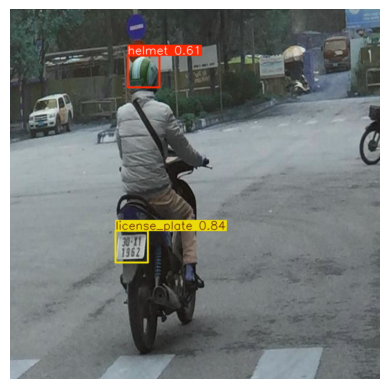

In [59]:
import matplotlib.pyplot as plt
results = model("C:/Users/akash/OneDrive/Desktop/pyt DA/helmet detection and number plate detection.v1i.voc/test/images/Image30_JPG_jpg.rf.b526401bcbfe2263501527e3808642f8.jpg", save=True)  # Replace with your test image path

# Show results


# Convert to a NumPy array and show with Matplotlib
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()



In [47]:
from PIL import Image  
img = Image.open("C:/Users/akash/runs/detect/predict/Image10_JPG_jpg.rf.e65b55528a15904a2d39db988d944b12.jpg")
img.show()


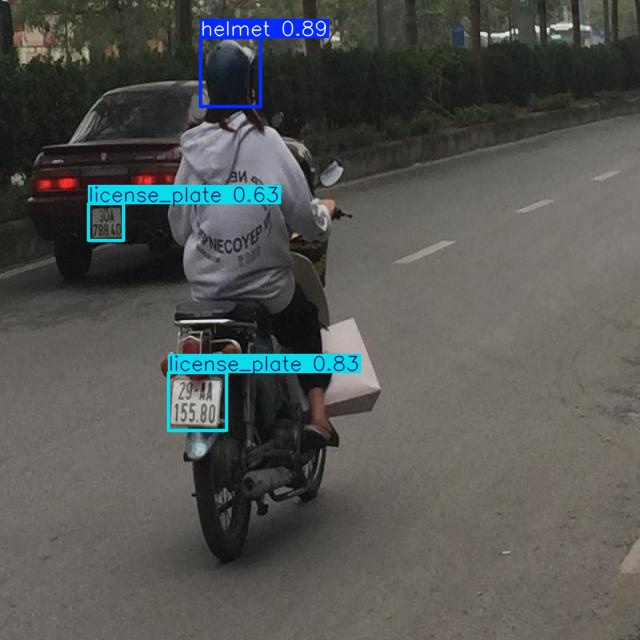

In [57]:
from IPython.display import display
from PIL import Image

# Open and display the image
img = Image.open(image_path)
display(img)


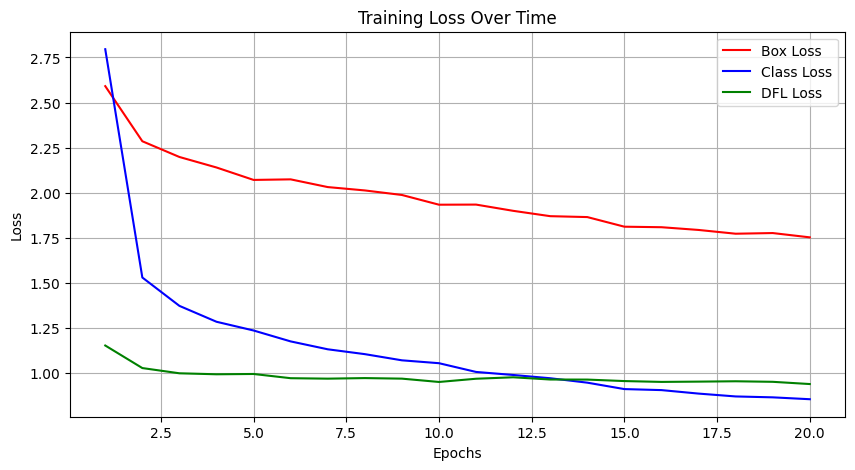

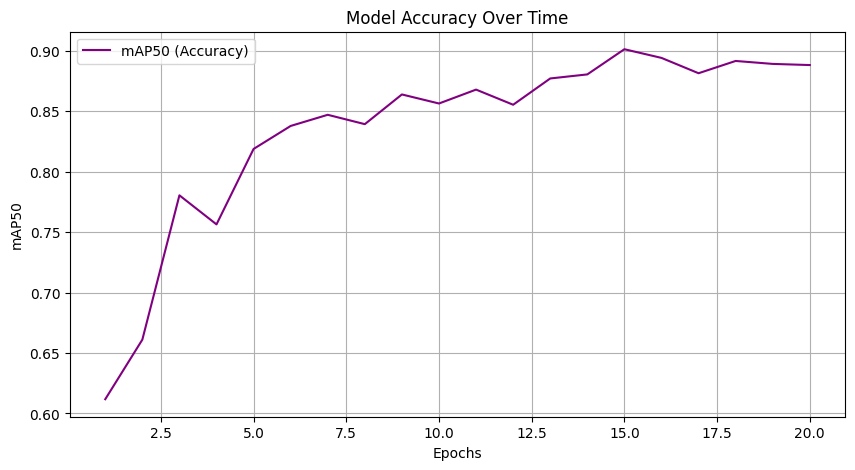

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure graphs display inline in Jupyter Notebook
%matplotlib inline  

# Set YOLO output directory
save_dir = "C:/Users/akash/runs/detect/train4"  # Change if different

# Load loss and accuracy logs
results_file = os.path.join(save_dir, "results.csv")

# Read training log file
df = pd.read_csv(results_file)
epochs = df["epoch"]

# --- Plot Loss Graph ---
plt.figure(figsize=(10, 5))
plt.plot(epochs, df["train/box_loss"], label="Box Loss", color="red")
plt.plot(epochs, df["train/cls_loss"], label="Class Loss", color="blue")
plt.plot(epochs, df["train/dfl_loss"], label="DFL Loss", color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid()
plt.show()

# --- Plot Accuracy (mAP) Graph ---
plt.figure(figsize=(10, 5))
plt.plot(epochs, df["metrics/mAP50(B)"], label="mAP50 (Accuracy)", color="purple")
plt.xlabel("Epochs")
plt.ylabel("mAP50")
plt.title("Model Accuracy Over Time")
plt.legend()
plt.grid()
plt.show()


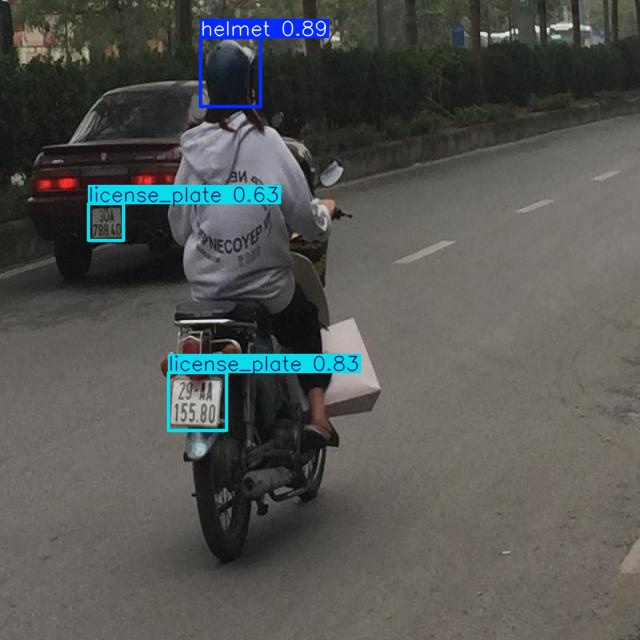

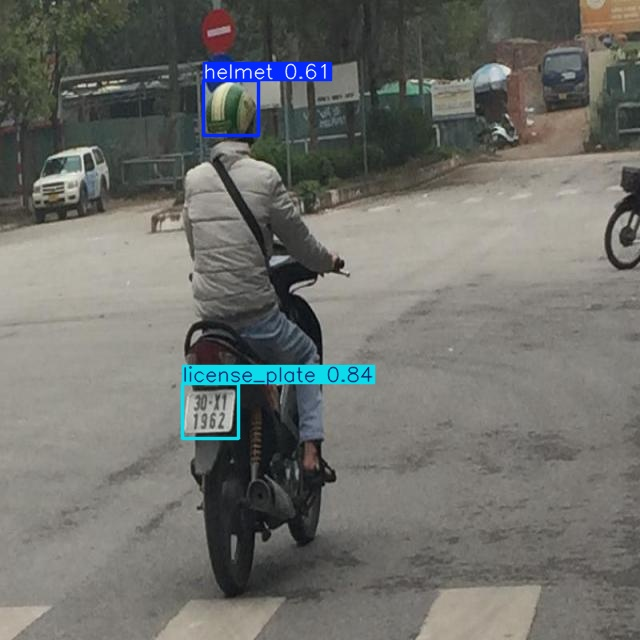

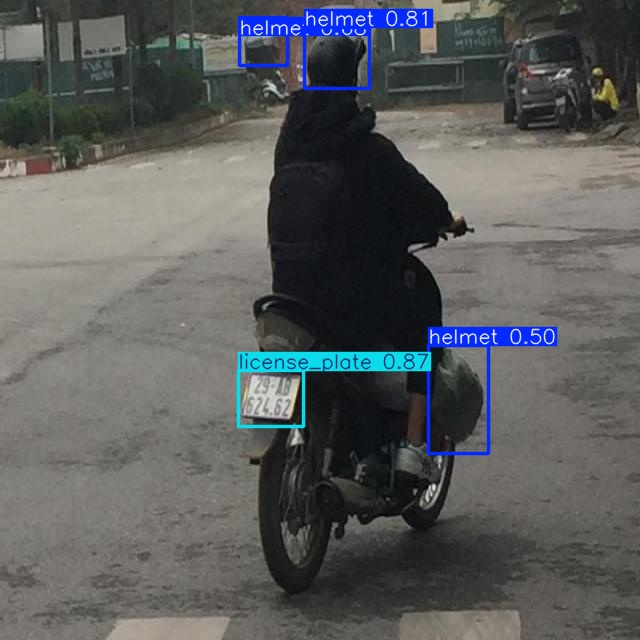

In [61]:
predictions_path = "C:/Users/akash/runs/detect/predict"

# Get 3 images from predictions folder
image_paths = glob.glob(os.path.join(predictions_path, "*.jpg"))[:3]

# Display images with bounding boxes
for image_path in image_paths:
    img = Image.open(image_path)
    display(img)  # Show the image